In [15]:
#초기설정
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
#gdp 데이터를 증가율로 변환
gdp_data=pd.read_excel("ECOS_TABLE_GDP.xlsx")
gdp_datas=gdp_data.T.iloc[4:]
gdp=gdp_datas.pct_change()*100

In [3]:
#fixed capital formation 데이터를 증가율로 변환
fcf_data=pd.read_excel("ECOS_TABLE_FCF.xlsx")
fcf_datas=fcf_data.T.iloc[4:]
fcf=fcf_datas.pct_change()*100

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
#gdp 증가율을 gdp_라는 리스트에 저장
#날짜는 dates 리스트에 저장
numbers=range(2020-1960+1)
gdp_=[0]*61
dates=range(1960, 2021,1)#61개
for x in numbers:
    gdp_[x]=gdp[0][x]

In [6]:
#fixed capital formation 증가율을 fcf_ 리스트에 저장
#날짜는 dates2 리스트에 저장
dates2=range(1970, 2019,1)
numbers2=range(2018-1970+1)
fcf_=[0]*49
for x in numbers2:
    fcf_[x]=fcf[0][x]

In [16]:
#1번-gdp 증가율의 proper AMRA model=ARMA(1,1)
gdp_[0]='0'
model=sm.tsa.ARMA(gdp_,order=(1,1)) 
results=model.fit(method='mle', trend='c')
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   61
Model:                     ARMA(1, 1)   Log Likelihood                -163.788
Method:                           mle   S.D. of innovations              3.526
Date:                Thu, 15 Apr 2021   AIC                            335.577
Time:                        19:23:52   BIC                            344.020
Sample:                             0   HQIC                           338.886
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9572      2.109      2.824      0.005       1.823      10.091
ar.L1.y        0.9442      0.057     16.575      0.000       0.833       1.056
ma.L1.y       -0.7042      0.125     -5.656      0.0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


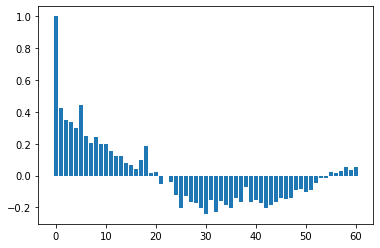

In [22]:
#gdp의 acf
gdp_[0]=0
n_lags=60
atcf_qs=stattools.acf(gdp_, nlags=60,qstat=True,fft=False)
temp=n_lags+1
plt.bar(range(temp),atcf_qs[0])
plt.show()

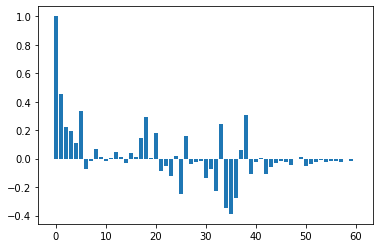

In [23]:
#gdp의 pacf
gdp_[0]=0
lag=60
lags=range(0,61)
pacf_qs=stattools.pacf_ols(gdp_,nlags=lag)
pacf_qs=list(pacf_qs)
plt.bar(lags, pacf_qs)
plt.show()
#acf, pacf:사인함수 형태, 진폭 줄어듦 --> ARMA(p,q)형태

In [9]:
#2번-fixed capital formation 증가율의 proper ARMA model=ARMA(0,1)
fcf_[0]='0'
model=sm.tsa.ARMA(fcf_,order=(0,1))
results=model.fit(method='mle', trend='c')
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   49
Model:                     ARMA(0, 1)   Log Likelihood                -172.969
Method:                           mle   S.D. of innovations              8.188
Date:                Thu, 15 Apr 2021   AIC                            351.938
Time:                        19:20:31   BIC                            357.613
Sample:                             0   HQIC                           354.091
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9239      2.029      3.905      0.000       3.947      11.901
ma.L1.y        0.7471      0.143      5.240      0.000       0.468       1.027
                                    Roots           

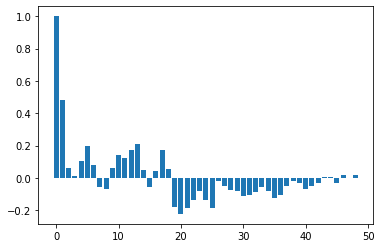

In [19]:
#fcf의 acf
fcf_[0]=0
n_lags=48
atcf_qs=stattools.acf(fcf_, nlags=n_lags,qstat=True,fft=False)
temp=n_lags+1
plt.bar(range(temp),atcf_qs[0])
plt.show()

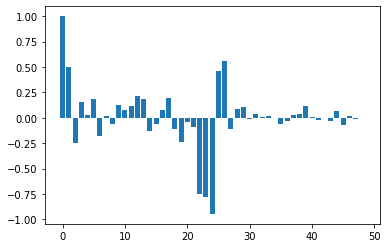

In [21]:
#fcf의 pacf
fcf_[0]=0
lag=48
lags=range(0,49)
pacf_qs=stattools.pacf_ols(fcf_,nlags=lag)
pacf_qs=list(pacf_qs)
plt.bar(lags, pacf_qs)
plt.show()
#acf : 첫 시차 후부터 0으로 수렴 중, pacf : 싸인함수 형태, 진폭 줄어듦 --> ARMA(0,q)형태

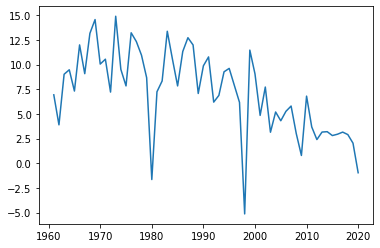

In [11]:
#3번-1)gdp 증가율 plot하기
numbers=range(2020-1960+1)
gdp_=[0]*61
dates=range(1960, 2021,1)
for x in numbers:
    gdp_[x]=gdp[0][x]
plt.plot(dates, gdp_)
plt.show()

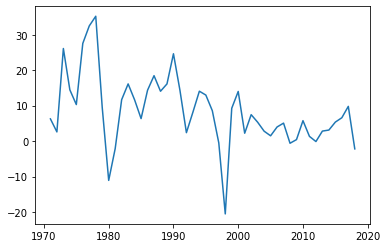

In [12]:
#3번-2)fixed capital formation 증가율 plot하기
dates2=range(1970, 2019,1)
numbers2=range(2018-1970+1)
fcf_=[0]*49
for x in numbers2:
    fcf_[x]=fcf[0][x]
plt.plot(dates2, fcf_)
plt.show()